In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
pd.set_option('display.max_rows', 500)

In [2]:
data2 = pd.read_csv("../../data/mega_2483.csv", sep=";")

In [3]:
data2.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2483,21/05/2022,54,49,34,38,40,20
1,2482,18/05/2022,32,1,57,44,35,45
2,2481,14/05/2022,1,37,36,21,8,27
3,2480,11/05/2022,31,56,6,4,50,9
4,2479,07/05/2022,21,10,35,20,17,15


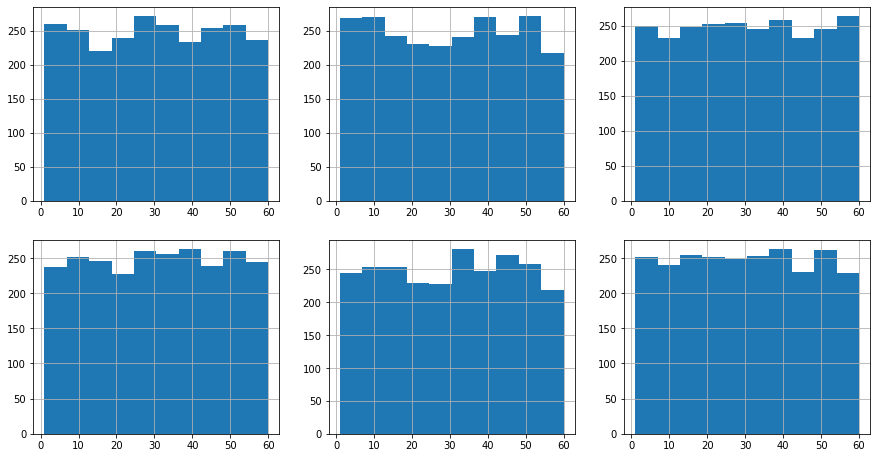

In [4]:
i = 1
plt.figure(figsize = (15,25))
for feature in data2[["bola 1", "bola 2", "bola 3", "bola 4", "bola 5", "bola 6"]]:
    plt.subplot(6,3,i)
    data2[feature].hist()
#     sns.countplot(x = feature ,  data = data)
    i +=1

In [5]:
l_bolas = []

for bola in data2[[x for x in data2.columns if x.startswith("bola")]]: 
    df_bola_x = data2[["Concurso", bola]].sort_values(by="Concurso").reset_index().drop("index", axis=1)
   
    for i in range(1, 61):
        indexes = df_bola_x[df_bola_x[bola] == i].index.tolist()
    
        for g in indexes:        
            df_bola_x.at[g,'diff_' + bola] = None


        for j, k in enumerate(indexes):
            if len(indexes) == j+1:
                break
            df_bola_x.at[k,'diff_' + bola] = df_bola_x.iloc[indexes[j+1]].Concurso - df_bola_x.iloc[k].Concurso
    l_bolas.append(df_bola_x)
    

In [18]:
from functools import reduce
df = reduce(lambda *l_bolas: pd.merge(*l_bolas, on='Concurso'), l_bolas)

In [10]:
df.tail()

,Concurso,bola 1,diff_bola 1,bola 2,diff_bola 2,bola 3,diff_bola 3,bola 4,diff_bola 4,bola 5,diff_bola 5,bola 6,diff_bola 6
2386,2387,38,49.0,26,13.0,30,61.0,8,19.0,31,64.0,48,14.0
2389,2390,20,87.0,13,57.0,9,43.0,56,40.0,32,36.0,22,12.0
2390,2391,5,78.0,8,79.0,13,10.0,27,8.0,50,64.0,36,80.0
2396,2397,6,19.0,14,17.0,48,26.0,46,20.0,20,52.0,39,31.0
2400,2401,8,19.0,38,4.0,13,71.0,33,34.0,11,15.0,48,4.0


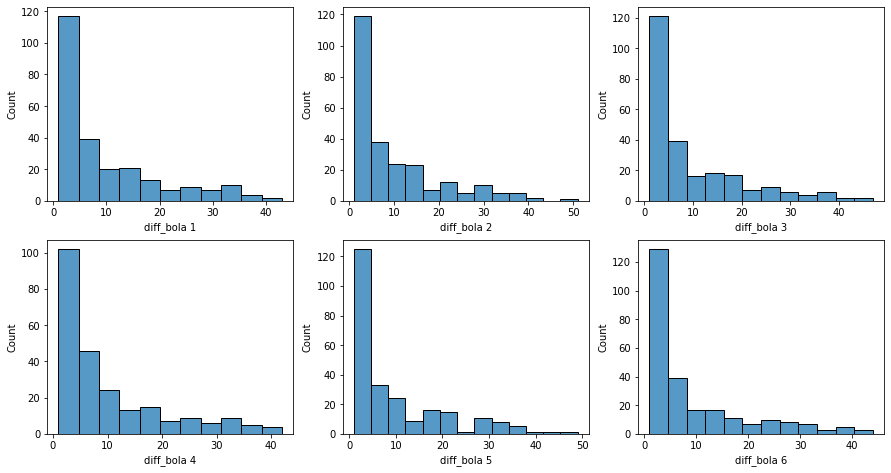

In [21]:
i = 1
plt.figure(figsize = (15,25))
for feature in df[[x for x in df.columns if x.startswith("diff")]]:
    plt.subplot(6,3,i)
    sns.histplot(df[feature].value_counts())
#     sns.countplot(x = feature ,  data = data)
    i +=1

In [15]:
v1 = data2["bola 1"].values
v2 = data2["bola 2"].values
v3 = data2["bola 3"].values
v4 = data2["bola 4"].values
v5 = data2["bola 5"].values
v6 = data2["bola 6"].values

In [43]:
for feature in df[[x for x in df.columns if x.startswith("diff")]]:
    print(np.array(df[feature].value_counts().head().index))
    print(np.median(np.array(df[feature].value_counts().head().index)))
    print(np.array(df[feature].value_counts().head().index).mean())
    print("\n")

[17.  3.  1. 18. 16.]
16.0
11.0


[1. 2. 5. 6. 9.]
5.0
4.6


[6. 8. 5. 9. 1.]
6.0
5.8


[10.  9.  3. 14. 16.]
10.0
10.4


[ 7.  2.  3.  6. 13.]
6.0
6.2


[10.  7.  3. 12.  1.]
7.0
6.6




In [16]:
from scipy.spatial import distance
def a(v1, v2):
    return distance.euclidean(v1, v2)

In [17]:
a(v1, v6)

1257.5313117374055

In [45]:
df.tail()

,Concurso,bola 1,diff_bola 1,bola 2,diff_bola 2,bola 3,diff_bola 3,bola 4,diff_bola 4,bola 5,diff_bola 5,bola 6,diff_bola 6
2386,2387,38,49.0,26,13.0,30,61.0,8,19.0,31,64.0,48,14.0
2389,2390,20,87.0,13,57.0,9,43.0,56,40.0,32,36.0,22,12.0
2390,2391,5,78.0,8,79.0,13,10.0,27,8.0,50,64.0,36,80.0
2396,2397,6,19.0,14,17.0,48,26.0,46,20.0,20,52.0,39,31.0
2400,2401,8,19.0,38,4.0,13,71.0,33,34.0,11,15.0,48,4.0
